                     Mean Median                         Mode  \
Age                20.956   21.0                         [22]   
Math_Score         64.708   64.5                         [59]   
Science_Score       68.22   68.0                         [67]   
English_Score      70.064   70.0                         [68]   
Attendance_Rate  80.08524  79.73  [69.68, 71.3, 80.02, 99.25]   
CGPA              6.76622   6.73                       [6.93]   

                Standard Deviation  Skewness  Kurtosis  
Age                       2.000517  0.001923 -1.237619  
Math_Score                9.963799  0.121476 -0.154224  
Science_Score            12.004825 -0.074657 -0.103641  
English_Score             7.824983 -0.030952 -0.001997  
Attendance_Rate          11.742626  0.008818 -1.193677  
CGPA                       0.57826  0.035926  0.019786  


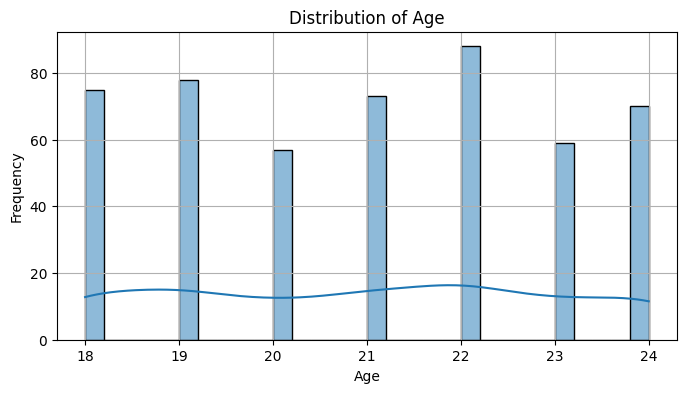

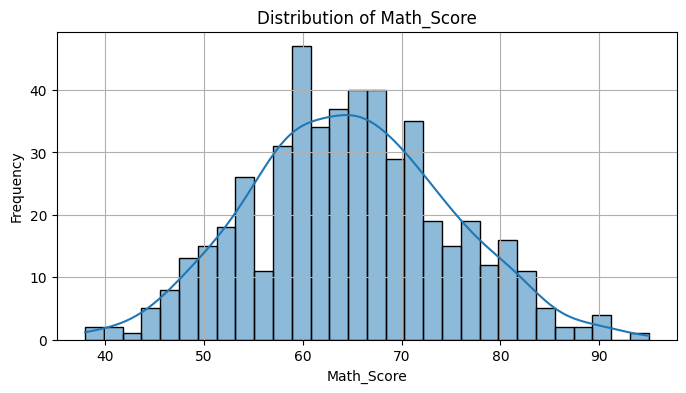

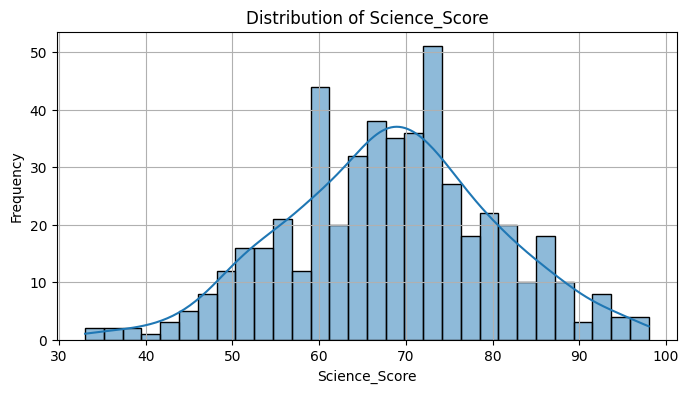

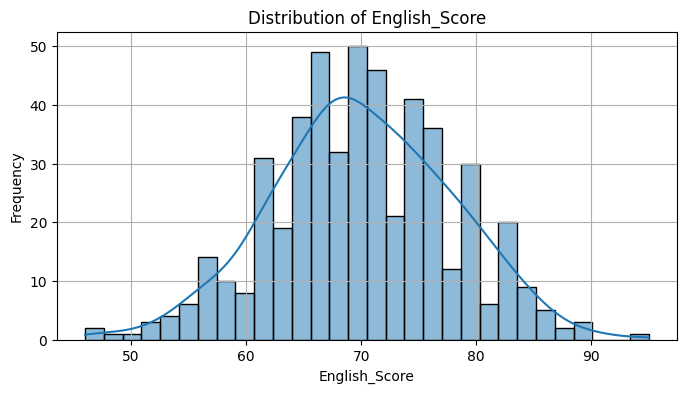

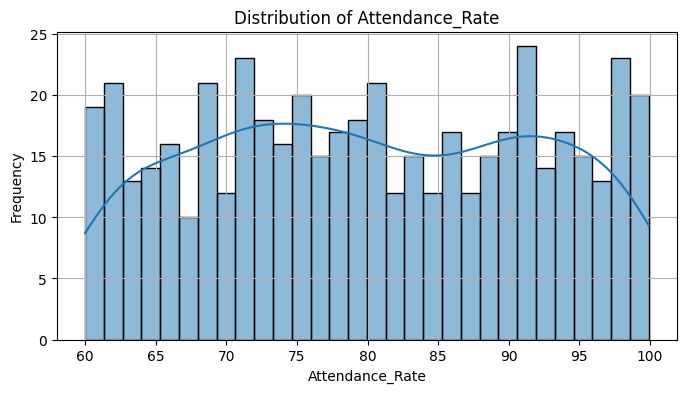

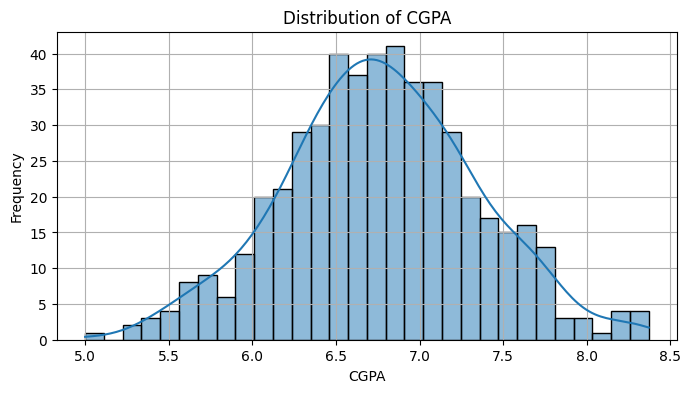

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Student_500.csv')

numerical_columns = ['Age', 'Math_Score', 'Science_Score', 'English_Score', 'Attendance_Rate', 'CGPA']

stats_summary = {}
for column in numerical_columns:
    stats_summary[column] = {
        'Mean': df[column].mean(),
        'Median': df[column].median(),
        'Mode': df[column].mode().values.tolist(),
        'Standard Deviation': df[column].std(),
        'Skewness': df[column].skew(),
        'Kurtosis': df[column].kurt()
    }

summary_df = pd.DataFrame(stats_summary).T
print(summary_df)

for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


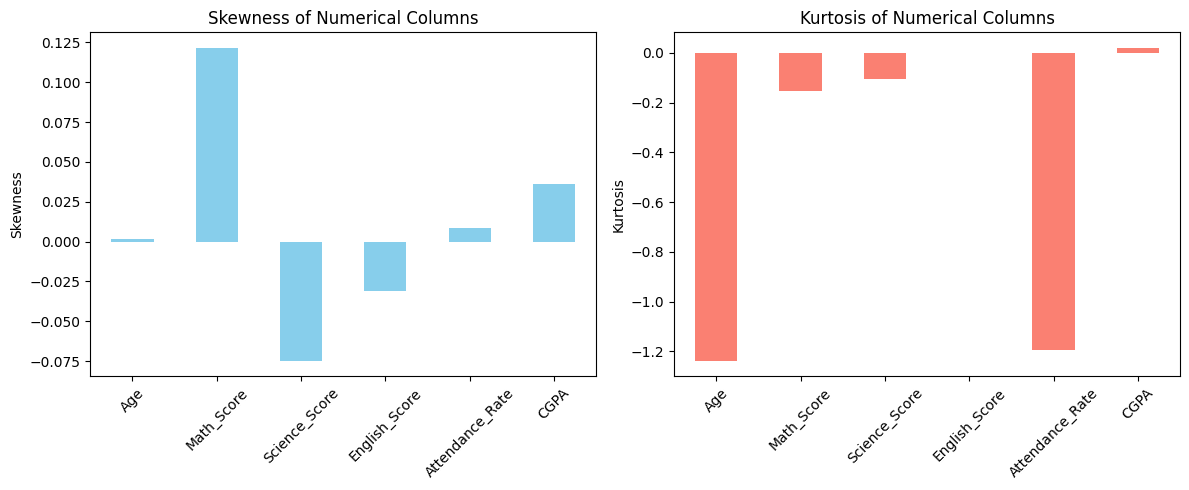

In [ ]:
import matplotlib.pyplot as plt

skewness = summary_df['Skewness']
kurtosis = summary_df['Kurtosis']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
skewness.plot(kind='bar', color='skyblue')
plt.title('Skewness of Numerical Columns')
plt.ylabel('Skewness')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
kurtosis.plot(kind='bar', color='salmon')
plt.title('Kurtosis of Numerical Columns')
plt.ylabel('Kurtosis')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


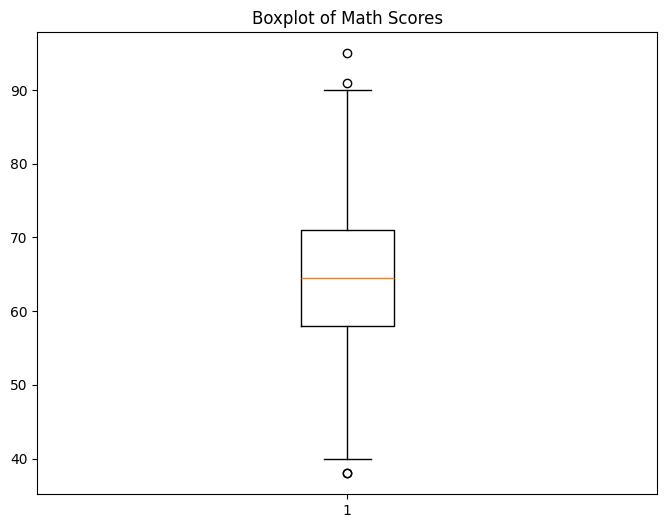

In [11]:

percentiles = np.percentile(df['Math_Score'], [10, 25, 50, 75, 90])

deciles = {
    'Q1(25%)': percentiles[1],
    'Q2(50%) - Median': percentiles[2],
    'Q3(75%)': percentiles[3],
}

Q1 = percentiles[1]
Q3 = percentiles[3]
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

plt.figure(figsize=(8,6))
plt.boxplot(df['Math_Score'], vert=True)
plt.title('Boxplot of Math Scores')
plt.show()
